# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer  #For VADER Model
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#For ROBERTA PRETRAINED Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
#For Checking Accuracy
from transformers import pipeline
#For DATA VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis[EDA]

In [2]:
df=pd.read_csv("C:\\Users\\Jannesh_OP\\Downloads\\Reviews.csv\\Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [3]:
df['Text'].sample(2)

369472    I'm a HUGE fan of Kind bars in general and hav...
510548    I know I can get Asian sweet rice flour somewh...
Name: Text, dtype: object

In [4]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

Text(0.5, 0, 'Star Rating')

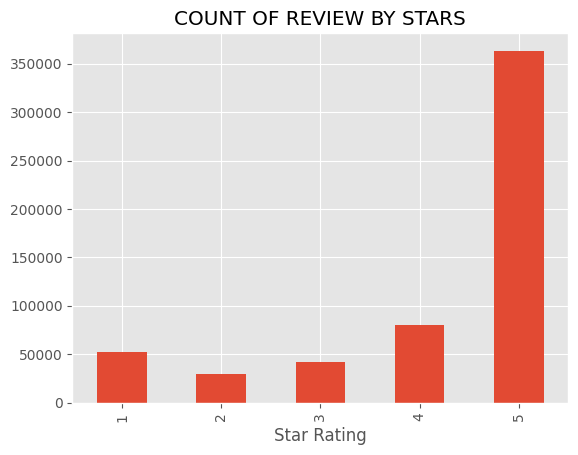

In [5]:
ax1=df['Score'].value_counts().sort_index().plot(kind='bar',title="COUNT OF REVIEW BY STARS")
ax1.set_xlabel('Star Rating')

In [6]:
#PERFORMING UNDERSAMPLING
from imblearn.under_sampling import RandomUnderSampler
rs=RandomUnderSampler(sampling_strategy={1:10000,2:10000,3:10000,4:10000,5:10000})
x_res,y_res=rs.fit_resample(df,df['Score'])

In [7]:
new_df=x_res
new_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
36949,36950,B001EQ4RWQ,A16Y1URTYWVZ92,B. Miller,0,0,1,1346803200,Bitter tasting,Since I follow a low carb diet and frequently ...
541648,541649,B001BM4RC8,A6ZJ3X7HNFPO7,Jane Twain,3,5,1,1292716800,Deceptive packaging-it does have GMO ingredients,Either these folks are completely ignorant or ...
325423,325424,B001LULT2Q,A341MLSIBYUS6J,The Harbor Guy,1,2,1,1261180800,Yuk!,My Mom bought a 3 pack from one of the TV shop...
548543,548544,B001EQ5PSQ,AVOC5KVDNYXLN,"J. Mckeon ""IRISHLAD""",1,2,1,1298073600,TASTE LIKE DIRT,I WISH I COULD GIVE THIS PRODUCT A NEGATIVE NU...
294561,294562,B003KFTPNK,A1ZJOU52BJG32S,Nutty,0,0,1,1345766400,Bad Nuts,Second time ordering these and they are ALL ba...
...,...,...,...,...,...,...,...,...,...,...
255231,255232,B0029NVJX8,A25KKXUQQ0OLWB,"Lynn Ellingwood ""The ESOL Teacher""",1,1,5,1324598400,My Cats Love This!,I was stunned at how much my cats love these W...
365557,365558,B000CQG89Y,A22OSVMG7LQXUQ,C. Smith,0,0,5,1326844800,fav Lemon Ginger tea so far...,I tried this tea for the first time at a resta...
340230,340231,B000ES5GLQ,A39M08SZ9MV6ZM,phd_Mama,0,0,5,1200614400,Delightfully Decaffeinated,"This tea is a treat, if you like black teas. ..."
97214,97215,B0011MAQ6O,A268YUI4HOUKB,Kathie,0,0,5,1303776000,not bad at all.,"In the Gluten free world, there isn't much to ..."


In [8]:
#AFTER UNDERSAMPLING
new_df['Score'].value_counts()

Score
1    10000
2    10000
3    10000
4    10000
5    10000
Name: count, dtype: int64

Text(0.5, 0, 'Star Rating')

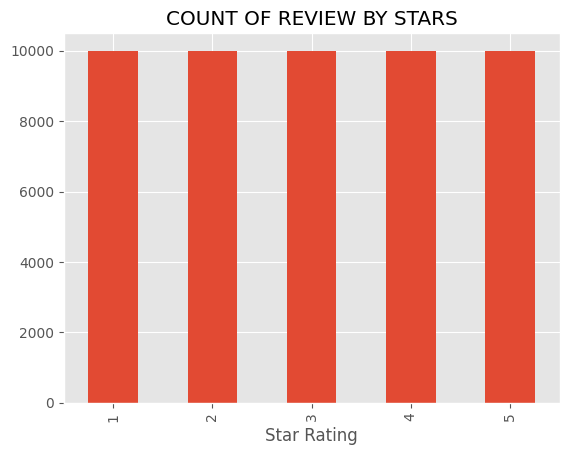

In [9]:
ax2=new_df['Score'].value_counts().sort_index().plot(kind='bar',title="COUNT OF REVIEW BY STARS")
ax2.set_xlabel('Star Rating')

# Classifying Amazon Food Reviews using VADER Model/Tool

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jannesh_OP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
sia=SentimentIntensityAnalyzer()

In [12]:
sia.polarity_scores(" It's as good as expected ")

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [13]:
sia.polarity_scores("It's ridiculous")

{'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.3612}

In [14]:
sia.polarity_scores("Most of the time it is good,but rarely it fails.")

{'neg': 0.0, 'neu': 0.794, 'pos': 0.206, 'compound': 0.3252}

In [15]:
res={}
for i ,row in tqdm(new_df.iterrows(),total=len(new_df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [16]:
vaders=pd.DataFrame(res).T
vaders

,neg,neu,pos,compound
36950,0.180,0.683,0.137,-0.5836
541649,0.048,0.898,0.054,0.3723
325424,0.140,0.761,0.099,-0.6792
548544,0.143,0.673,0.185,0.6807
294562,0.192,0.808,0.000,-0.7841
...,...,...,...,...
255232,0.106,0.643,0.251,0.7575
365558,0.077,0.766,0.158,0.8812
340231,0.000,0.608,0.392,0.9245
97215,0.000,0.679,0.321,0.7935


In [17]:
vaders=vaders.rename(columns={'neg':"vaders_negative",'neu':"vaders_neutral",'pos':"vaders_positive",'compound':"vaders_compound"})

In [18]:
vaders

,vaders_negative,vaders_neutral,vaders_positive,vaders_compound
36950,0.180,0.683,0.137,-0.5836
541649,0.048,0.898,0.054,0.3723
325424,0.140,0.761,0.099,-0.6792
548544,0.143,0.673,0.185,0.6807
294562,0.192,0.808,0.000,-0.7841
...,...,...,...,...
255232,0.106,0.643,0.251,0.7575
365558,0.077,0.766,0.158,0.8812
340231,0.000,0.608,0.392,0.9245
97215,0.000,0.679,0.321,0.7935


In [19]:
vaders=vaders.reset_index()
vaders

,index,vaders_negative,vaders_neutral,vaders_positive,vaders_compound
0,36950,0.180,0.683,0.137,-0.5836
1,541649,0.048,0.898,0.054,0.3723
2,325424,0.140,0.761,0.099,-0.6792
3,548544,0.143,0.673,0.185,0.6807
4,294562,0.192,0.808,0.000,-0.7841
...,...,...,...,...,...
49995,255232,0.106,0.643,0.251,0.7575
49996,365558,0.077,0.766,0.158,0.8812
49997,340231,0.000,0.608,0.392,0.9245
49998,97215,0.000,0.679,0.321,0.7935


In [20]:
vaders=vaders.rename(columns={'index':'Id'})

In [21]:
vaders=vaders.merge(new_df,how='left')
vaders

,Id,vaders_negative,vaders_neutral,vaders_positive,vaders_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,36950,0.180,0.683,0.137,-0.5836,B001EQ4RWQ,A16Y1URTYWVZ92,B. Miller,0,0,1,1346803200,Bitter tasting,Since I follow a low carb diet and frequently ...
1,541649,0.048,0.898,0.054,0.3723,B001BM4RC8,A6ZJ3X7HNFPO7,Jane Twain,3,5,1,1292716800,Deceptive packaging-it does have GMO ingredients,Either these folks are completely ignorant or ...
2,325424,0.140,0.761,0.099,-0.6792,B001LULT2Q,A341MLSIBYUS6J,The Harbor Guy,1,2,1,1261180800,Yuk!,My Mom bought a 3 pack from one of the TV shop...
3,548544,0.143,0.673,0.185,0.6807,B001EQ5PSQ,AVOC5KVDNYXLN,"J. Mckeon ""IRISHLAD""",1,2,1,1298073600,TASTE LIKE DIRT,I WISH I COULD GIVE THIS PRODUCT A NEGATIVE NU...
4,294562,0.192,0.808,0.000,-0.7841,B003KFTPNK,A1ZJOU52BJG32S,Nutty,0,0,1,1345766400,Bad Nuts,Second time ordering these and they are ALL ba...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,255232,0.106,0.643,0.251,0.7575,B0029NVJX8,A25KKXUQQ0OLWB,"Lynn Ellingwood ""The ESOL Teacher""",1,1,5,1324598400,My Cats Love This!,I was stunned at how much my cats love these W...
49996,365558,0.077,0.766,0.158,0.8812,B000CQG89Y,A22OSVMG7LQXUQ,C. Smith,0,0,5,1326844800,fav Lemon Ginger tea so far...,I tried this tea for the first time at a resta...
49997,340231,0.000,0.608,0.392,0.9245,B000ES5GLQ,A39M08SZ9MV6ZM,phd_Mama,0,0,5,1200614400,Delightfully Decaffeinated,"This tea is a treat, if you like black teas. ..."
49998,97215,0.000,0.679,0.321,0.7935,B0011MAQ6O,A268YUI4HOUKB,Kathie,0,0,5,1303776000,not bad at all.,"In the Gluten free world, there isn't much to ..."


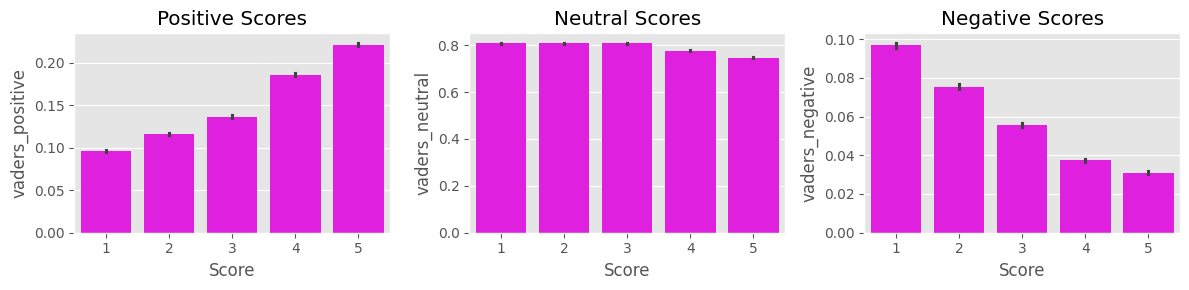

In [22]:
#Visualizing The Change In Scores With Respect To Star Ratings
fig,ax3=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='vaders_positive',ax=ax3[0],color='magenta')
sns.barplot(data=vaders,x='Score',y='vaders_neutral',ax=ax3[1],color='magenta')
sns.barplot(data=vaders,x='Score',y='vaders_negative',ax=ax3[2],color='magenta')
ax3[0].set_title("Positive Scores")
ax3[1].set_title("Neutral Scores")
ax3[2].set_title("Negative Scores")
plt.tight_layout()

In [23]:
#Setting Threshold values
vpred=[]
for i,row in tqdm(vaders.iterrows(),total=len(vaders)):
    comp_score=row['vaders_compound']
    if(comp_score>0.4):
        vpred.append("Positve")
    elif(comp_score<0):
        vpred.append("Negative")
    else:
        vpred.append("Neutral")

  0%|          | 0/50000 [00:00<?, ?it/s]

In [24]:
vpred=pd.DataFrame(vpred)

In [25]:
vaders_fin=pd.concat([vaders,vpred],axis=1)

In [26]:
vaders_fin=vaders_fin.rename(columns={0:'Vaders Prediction'})
vaders_fin

,Id,vaders_negative,vaders_neutral,vaders_positive,vaders_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Vaders Prediction
0,36950,0.180,0.683,0.137,-0.5836,B001EQ4RWQ,A16Y1URTYWVZ92,B. Miller,0,0,1,1346803200,Bitter tasting,Since I follow a low carb diet and frequently ...,Negative
1,541649,0.048,0.898,0.054,0.3723,B001BM4RC8,A6ZJ3X7HNFPO7,Jane Twain,3,5,1,1292716800,Deceptive packaging-it does have GMO ingredients,Either these folks are completely ignorant or ...,Neutral
2,325424,0.140,0.761,0.099,-0.6792,B001LULT2Q,A341MLSIBYUS6J,The Harbor Guy,1,2,1,1261180800,Yuk!,My Mom bought a 3 pack from one of the TV shop...,Negative
3,548544,0.143,0.673,0.185,0.6807,B001EQ5PSQ,AVOC5KVDNYXLN,"J. Mckeon ""IRISHLAD""",1,2,1,1298073600,TASTE LIKE DIRT,I WISH I COULD GIVE THIS PRODUCT A NEGATIVE NU...,Positve
4,294562,0.192,0.808,0.000,-0.7841,B003KFTPNK,A1ZJOU52BJG32S,Nutty,0,0,1,1345766400,Bad Nuts,Second time ordering these and they are ALL ba...,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,255232,0.106,0.643,0.251,0.7575,B0029NVJX8,A25KKXUQQ0OLWB,"Lynn Ellingwood ""The ESOL Teacher""",1,1,5,1324598400,My Cats Love This!,I was stunned at how much my cats love these W...,Positve
49996,365558,0.077,0.766,0.158,0.8812,B000CQG89Y,A22OSVMG7LQXUQ,C. Smith,0,0,5,1326844800,fav Lemon Ginger tea so far...,I tried this tea for the first time at a resta...,Positve
49997,340231,0.000,0.608,0.392,0.9245,B000ES5GLQ,A39M08SZ9MV6ZM,phd_Mama,0,0,5,1200614400,Delightfully Decaffeinated,"This tea is a treat, if you like black teas. ...",Positve
49998,97215,0.000,0.679,0.321,0.7935,B0011MAQ6O,A268YUI4HOUKB,Kathie,0,0,5,1303776000,not bad at all.,"In the Gluten free world, there isn't much to ...",Positve


# Classifying Amazon Food Reviews using ROBERTA Pretrained Model

In [27]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)

C:\Users\Jannesh_OP\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [28]:
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [29]:
def roberta_polarity_scores(text):
  encoded_txt=tokenizer(text,return_tensors='pt')
  output=model(**encoded_txt)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={'roberta_negative':scores[0],'roberta_neutral':scores[1],'roberta_positive':scores[2]}
  return scores_dict

In [30]:
result={}
for i ,row in tqdm(new_df.iterrows(),total=len(new_df)):
  try:
    text=row['Text']
    myid=row['Id']
    result[myid]=roberta_polarity_scores(text)
  except Exception as e:
        pass

  0%|          | 0/50000 [00:00<?, ?it/s]

In [55]:
roberta=pd.DataFrame(result).T
roberta=roberta.reset_index().rename(columns={'index':'Id'})

In [56]:
roberta

,Id,roberta_negative,roberta_neutral,roberta_positive
0,36950,0.720732,0.220665,0.058602
1,541649,0.907032,0.085733,0.007235
2,325424,0.954051,0.040156,0.005793
3,548544,0.884687,0.100656,0.014657
4,294562,0.968016,0.028398,0.003586
...,...,...,...,...
49351,255232,0.009739,0.043622,0.946639
49352,365558,0.068016,0.194157,0.737827
49353,340231,0.002184,0.023451,0.974365
49354,97215,0.136429,0.377610,0.485961


In [57]:
roberta=roberta.merge(vaders_fin,how='left')

In [58]:
roberta_polarity_scores("It's good as expected")

{'roberta_negative': 0.004768511,
 'roberta_neutral': 0.034252327,
 'roberta_positive': 0.96097916}

In [59]:
roberta_polarity_scores("It's ridiculous")

{'roberta_negative': 0.8409562,
 'roberta_neutral': 0.13255268,
 'roberta_positive': 0.02649107}

In [60]:
roberta_polarity_scores("Most of the time it is good,but rarely it fails.")

{'roberta_negative': 0.08156522,
 'roberta_neutral': 0.3165666,
 'roberta_positive': 0.60186815}

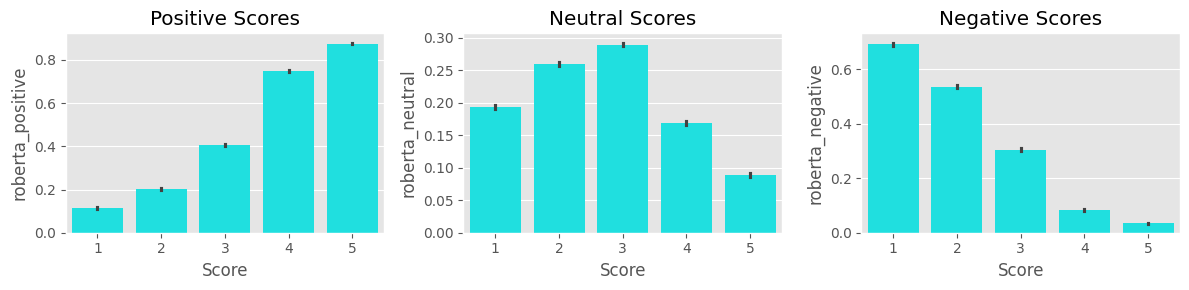

In [61]:
#Visualizing The Change In Scores With Respect To Star Ratings
fig,ax4=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=roberta,x='Score',y='roberta_positive',ax=ax4[0],color='cyan')
sns.barplot(data=roberta,x='Score',y='roberta_neutral',ax=ax4[1],color='cyan')
sns.barplot(data=roberta,x='Score',y='roberta_negative',ax=ax4[2],color='cyan')
ax4[0].set_title("Positive Scores")
ax4[1].set_title("Neutral Scores")
ax4[2].set_title("Negative Scores")
plt.tight_layout()

In [62]:
#Setting Threshold Values
rpred=[]
for i,row in tqdm(roberta.iterrows(),total=len(roberta)):
    compute_scores=[row['roberta_negative'],row['roberta_neutral'],row['roberta_positive']]
    if(max(compute_scores)==compute_scores[0]):
        rpred.append("Negative")
    elif(max(compute_scores)==compute_scores[1]):
        rpred.append("Neutral")
    else:
        rpred.append("Positive")

  0%|          | 0/49356 [00:00<?, ?it/s]

In [99]:
rpred=pd.DataFrame(rpred)

In [105]:
roberta_fin=pd.concat([roberta,rpred],axis=1)
roberta_fin=roberta_fin.rename(columns={0:"Roberta Prediction"})
roberta_fin.sample(3)

,Id,roberta_negative,roberta_neutral,roberta_positive,vaders_negative,vaders_neutral,vaders_positive,vaders_compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Vaders Prediction,Roberta Prediction
13273,117138,0.767848,0.192827,0.039325,0.050,0.844,0.106,0.3514,B001J9SUHG,A2TJTUP3LEUHWY,mary,0,1,2,1342137600,Disappointed,"I was so disappointed. I had heard so many people talk about how their dogs loved these type of chews, but when I presented it to my dog she is totally uninterested. In as far as the delivery process goes, everything was fine.",Neutral,Negative
12757,234984,0.678724,0.253050,0.068226,0.103,0.855,0.042,-0.7933,B000KV7ZGQ,A2GERLJV5N0SZV,jbc3000,1,3,2,1324425600,Not as pictured...,"The picture shown does not match the item I received. I specifically ordered this product because it showed the jug to have a plastic rope and not an actual rope (my dog loves to tear apart ropes, and I'd had a tug-a-jug that had the plastic rope previously and that was a great product. I'm not sure if they're making it with the plastic rope anymore, but I assumed that since that was what was shown, that's what I'd receive.) I'm not really happy with this bait and switch because I have to closely monitor my dog with this toy to make sure she doesn't shred the rope and render it useless.",Negative,Negative
11059,525720,0.367020,0.398413,0.234567,0.147,0.693,0.159,-0.0155,B0041FEARE,A3F0ZYNNJCQ2BP,Kindle Reader,0,0,2,1328918400,Nothing special,"This coffee is sort of grocery store quality-a whole bean folgers maybe. We like Folgers for a change, but we don't like paying these bigger prices for such small quality. It says it is espresso, but it brews very weak. The flavor is fine, but again, weak. We weren't impressed with how it has turned out. The Three Peckered Goat flavor was great, however.",Negative,Neutral


# Analayzing The Classification Done By VADER Model and ROBERTA Pretrained Model 

In [102]:
pd.set_option('display.max_colwidth', None)

In [66]:
comp_df=roberta_fin[['Id','Summary','Score','Text','Vaders Prediction','Roberta Prediction']]
comp_df

,Id,Summary,Score,Text,Vaders Prediction,Roberta Prediction
0,36950,Bitter tasting,1,"Since I follow a low carb diet and frequently cook with erythritol, I thought this would be the perfect addition to my Breyers carb smart ice cream. I was so wrong. All I can taste is the added zinc which makes it taste bitter and nasty. My first thought is that it tastes like battery acid. All I can hope that is that it is reformulated and the bitter metallic zinc taste is removed!",Negative,Negative
1,541649,Deceptive packaging-it does have GMO ingredients,1,"Either these folks are completely ignorant or they think putting "" no genetically engineered ingredients"" on the front of the package will cause us to to ignore their list of ingredients on the back. Canola oil is made from genetically modified rapeseed. They also say it may have Safflower or Sunflower oil, but I'd<br />rather not take part in that lottery. I'd like to send back this lot, but I'm not willing to bet, they would not have the nerve to sell it to the next unsuspecting soul, so it will go straight into the trash can ,where it belongs.",Neutral,Negative
2,325424,Yuk!,1,"My Mom bought a 3 pack from one of the TV shopping channels a few months ago. After watching the hosts ""salivate"" over the stuff, she ordered it.<br /><br />The result...BLECK! Horrible! Tastes fake and like chemicals. And the salt level...forget it. We had 5 different people taste all 3 and we all agreed, awful.<br /><br />I sent it back within a couple days. If you want bacon for heavens sake, buy some real bacon and forget this fake junk.",Negative,Negative
3,548544,TASTE LIKE DIRT,1,"I WISH I COULD GIVE THIS PRODUCT A NEGATIVE NUMBER FOR MY REVIEW.....THIS IS THE WORST THING I HAVE EVER PURCHASED HERE ON AMAZON IN THE LAST 14 YRS OF USING THIS WONDERFUL SITE. PLEASE DON'T BUY THIS PRODUCT, IT LITERALLY TASTE LIKE ""DIRT"". I CAN'T BELIEVE ANYONE WHO HAS TRIED THIS PRODUCT HAS LIKED IT.... NOTICED I HAVEN'T CALLED THIS PRODUCT BY IT'S NAME ""CINNAMON"" REASON? BECAUSE IT'S NOT....IT'S DIRT. SAVE YOUR MONEY AND GO PICK UP MCCORMICKS CINNAMON(WHAT I HAD TO DO). IF THE PEOPLE THAT MAKE THIS DIRT READ THIS REVIEW PLEASE CONTACT ME AND LET ME KNOW HOW I CAN GET A REFUND AND RETURN THIS DIRT TO YOU. YOU GUYS SHOULD BE ASHAMED OF YOURSELVES FOR SELLING THIS ""DIRT"" AND PASSING IT OFF AS CINNAMON.",Positve,Negative
4,294562,Bad Nuts,1,"Second time ordering these and they are ALL bad this time. They came soft and chewy and because we had already opened the package, they can't be sent back. Very disappointed.",Negative,Negative
...,...,...,...,...,...,...
49351,255232,My Cats Love This!,5,I was stunned at how much my cats love these Whiskas Temptations. Some of the other flavors weren't so thrilling but this one is a winner.,Positve,Positive
49352,365558,fav Lemon Ginger tea so far...,5,"I tried this tea for the first time at a restaurant - 1st time iced - cool & refreshing, 2nd time hot - mmmm. The taste leans more to the ginger side and not the lemon. I have tried other brands such as Yogi and Twinings. I did not like the Yogi brand at all (yuck!), the Twinings' brand while not disgusting taste like lemon tea with a 'hint' of ginger. I have tasted other brands that have a stronger ginger taste than Stash but they've also had a strange taste to them as well so so far Stash is my favorite. This tea is great for upset tummy.",Positve,Positive
49353,340231,Delightfully Decaffeinated,5,"This tea is a treat, if you like black teas. Whereas other black decaf teas (English Breakfast, Earl Grey, traditional orange pekoe) left me wanting, this tea has lovely aroma and substantial body. A cup of comfort!",Positve,Positive
49354,97215,not bad at all.,5,"In the Gluten free world, there isn't much to choose from that's worth eating twice. This stuff isn't too bad.",Positve,Positive


<Axes: xlabel='Vaders Prediction'>

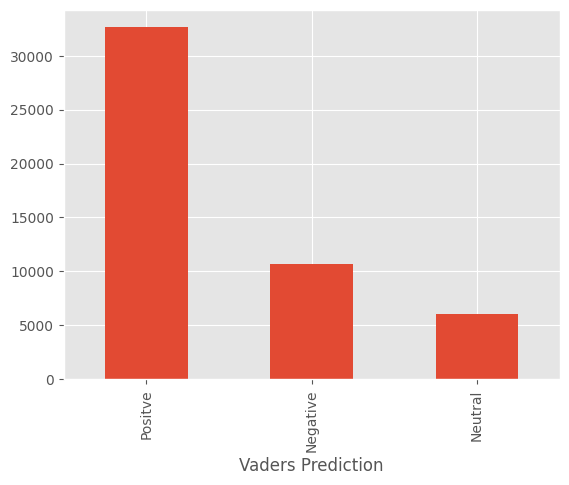

In [83]:
comp_df['Vaders Prediction'].value_counts().plot(kind='bar')

<Axes: xlabel='Roberta Prediction'>

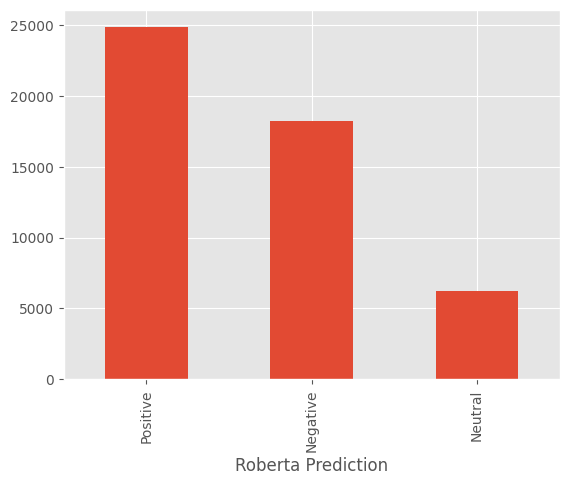

In [84]:
comp_df['Roberta Prediction'].value_counts().plot(kind='bar')

In [69]:
inacc=[]
for i ,rows in tqdm(comp_df.iterrows(),total=len(comp_df)):
    vad=rows['Vaders Prediction']
    rob=rows['Roberta Prediction']
    star=rows['Score']
    if(vad!=rob):
        inacc.append([rows['Id'],star,vad,rob])

  0%|          | 0/49356 [00:00<?, ?it/s]

In [70]:
inacc[16]

[313446, 1, 'Positve', 'Negative']

In [87]:
comp_df[comp_df['Id']==313446]['Text']  #THIS IS CLEARLY A NEGATIVE COMMENT AS STATED BY ROBERTA MODEL

37    I ve had this exact kind a ton of times at my local deli and love their taste, figured i d save a bunch by getting a box of 24 delivered to my desk at work. Unfortunately, I think they unloaded their oldest/worst batch on me. The chips tasted stale, leached out a ton of oil ( I m not kidding, felt like I was eating pizza given how much oil i was leaching out with a napkin from each individual chip!) and the taste was just off. I think with all the oil that leached out, it upset the flavor balance of the chip and now they just taste really salty and stale.<br /><br />Tried 3 different bags, and it was the same in each case (couldnt eat more than a couple of chips, they were that bad). Got in touch with Amazon customer care, and they were kind enough to get me a refund, but i recommend that you save yourself the hassle and give these a miss.
Name: Text, dtype: object

In [90]:
inacc[36]

[169572, 1, 'Positve', 'Negative']

In [91]:
comp_df[comp_df['Id']==169572]['Text']  #THIS IS CLEARLY A NEGATIVE STATEMENT [WITH SOME SARCASM!!] AS PREDICTED BY ROBERTA MODEL

79    i was wondering why it was so much cheaper than the other flavors... now I know... my cat wouldnt touch it. He acted like it stunk and backed away.<br />he then went over to eat his day old dried cat food rather than eat this junk.<br />Im concerned that someone wrote it might be tainted and be recalled later. well ill save it in case it does get recalled-maybe then i can get a refund. i dont like how amazon wont let you return food items(unless recalled), especially when they are just unopened cans.<br /><br />alot of people gave it good ratings but alot of people didnt.. I think if you only have one cat like me, the odds are bad... and you shouldnt buy it.
Name: Text, dtype: object

In [93]:
inacc[49]

[289993, 1, 'Positve', 'Negative']

In [94]:
comp_df[comp_df['Id']==289993]['Text']  #THIS IS CLEARLY A NEGATIVE STATEMENT AS PREDICTED BY ROBERTA MODEL

98    this is the worst.  i was looking for a way to make a pumpkin spice latte at home, without all the carbs.  this syrup is awful.  it smells nothing like pumpkin - at all.  and tastes like cough medicine.  i couldn't recommend this product if i wanted to.  i took a chance on it because i couldn't find it locally.  you win some.  you lose some.  i lost.<br /><br />i will say, however, that the vendor was wonderful.  it was safely packaged and shipped quickly.<br /><br />if anyone has any recommendations as to how to use this product, please feel free to leave a comment on this review.  i would love to be able to use it.  unfortunately, between the smell and the taste, i see no way to do so.
Name: Text, dtype: object

In [76]:
# SO IT IS EVIDENT THAT ROBERTA PRETRAINED MODEL PERFORMS BETTER THAN VADER MODEL IN CASES OF COMPLEX RELATIONSHIPS BETWEEN WORDS

# Give Any Random Statements To Perform Sentiment Analysis using ROBERTA PRETRAINED Model

In [77]:
def trying(example):
    cal=roberta_polarity_scores(example)
    s1,s2,s3=cal.get("roberta_negative"),cal.get("roberta_neutral"),cal.get("roberta_positive")
    if(max(s1,s2,s3)==s1):
       print("THE STATEMENT IS NEGATIVE")
    elif(max(s1,s2,s3)==s2):
       print("THE STATEMENT IS NEUTRAL")
    else:
        print("THE STATEMENT IS POSITIVE")

In [54]:
#TRY ANY STATEMENT HERE
trying("HE GOT SUCH LOW MARKS HOW CAN I BE HAPPY ABOUT IT")

THE STATEMENT IS NEGATIVE


In [86]:
new_df.to_csv("UnderSampled DataSet.csv",index=False)